<a href="https://colab.research.google.com/github/etatc/Autoencoder_Pokemon/blob/main/pokemon_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model
from keras.backend import flatten
import keras.models as model

In [ ]:
def build_autoencoder(img_shape, encoding_dim):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(encoding_dim))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((encoding_dim,)))
    decoder.add(Dense(np.prod(img_shape))) # np.prod(img_shape) is the same as 32*32*3, it's more generic than saying 3072
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [ ]:
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [ ]:
uploaded = files.upload()


Saving kaggle (2).json to kaggle (2).json


In [ ]:
!mkdir /.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d hannesrosenbusch/6036-labeled-pokemon-pictures

 78% 65.0M/83.1M [00:00<00:00, 59.4MB/s]
100% 83.1M/83.1M [00:00<00:00, 101MB/s] 


In [ ]:
from zipfile import ZipFile

# Create a ZipFile Object and load sample.zip in it
with ZipFile('6036-labeled-pokemon-pictures.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import numpy as np
x_train = np.load('poke_image_data.npy','r')
x_test = np.load('poke_image_data.npy','r')

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_test = x_test[3000:]
x_train = x_train[:3000]
print(x_train.shape)
print(x_test.shape)

(3000, 100, 100, 3)
(3036, 100, 100, 3)


In [ ]:
encoding_dim =  15000
img_shape = (100,100,3)

encoder, decoder = build_autoencoder(img_shape, encoding_dim)

inp = Input(img_shape)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp,reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

print(autoencoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 15000)             450015000 
_________________________________________________________________
sequential_3 (Sequential)    (None, 100, 100, 3)       450030000 
Total params: 900,045,000
Trainable params: 900,045,000
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import matplotlib.pyplot as plt

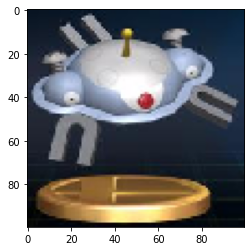

In [ ]:
plt.imshow(x_test[26].reshape(100,100,3))

In [ ]:
autoencoder = model.load_model('autoencodev2.h5')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=100,
                shuffle=True,
                validation_data=(x_train, x_train))

Epoch 1/20
30/30 [==============================] - 56s 2s/step - loss: 0.0791 - val_loss: 0.0786
Epoch 2/20
30/30 [==============================] - 50s 2s/step - loss: 0.0784 - val_loss: 0.0778
Epoch 3/20
30/30 [==============================] - 46s 2s/step - loss: 0.0776 - val_loss: 0.0772
Epoch 4/20
30/30 [==============================] - 49s 2s/step - loss: 0.0770 - val_loss: 0.0765
Epoch 5/20
30/30 [==============================] - 47s 2s/step - loss: 0.0762 - val_loss: 0.0757
Epoch 6/20
30/30 [==============================] - 50s 2s/step - loss: 0.0755 - val_loss: 0.0751
Epoch 7/20
30/30 [==============================] - 49s 2s/step - loss: 0.0749 - val_loss: 0.0743
Epoch 8/20
30/30 [==============================] - 49s 2s/step - loss: 0.0742 - val_loss: 0.0737
Epoch 9/20
30/30 [==============================] - 46s 2s/step - loss: 0.0736 - val_loss: 0.0730
Epoch 10/20
30/30 [==============================] - 48s 2s/step - loss: 0.0729 - val_loss: 0.0724
Epoch 11/20
30/30 [

In [ ]:
encoder.save('encoder.h5')

In [ ]:
decoder.save('decoder.h5')

In [ ]:
autoencoder.save('autoencodev3.h5')

In [ ]:
encoder = model.load_model('encoder.h5')

In [ ]:
decoder = model.load_model('decoder.h5')

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

NameError: ignored

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


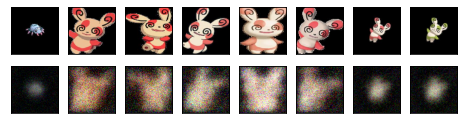

In [ ]:
import matplotlib.pyplot as plt

n = 8 # how many digits we will display
j = 2000 # shift the viewing window
plt.figure(figsize=(8, 2))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i + j])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i + j])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()